# Lecture 09
## CircuitPython
___

**Instructions for Running *CircuitPython* code on the CPB**

- Download the *Mu Editor* (or similar *CircuitPython* aware editor)
- Connect a CPB to your computer then start *Mu*
- Write/save scripts to `code.py` on the CPB (replacing any existing code)
  - Saving will automatically cause the board to restart
  - `code.py` will automatically run after each restart

***Mu* features**

- *Serial* button opens a command line (REPL)
- Click in the REPL
  - CTRL-C interrupts execution
  - CTRL-D restarts execution
- Printed output displays in the REPL
- Input commands receive input from the REPL

**Common *CircuitPython* Modules**

- Nearly everything that you have already learned about *Python* can be used when programming in *CircuitPython*
- What’s new is the addition of special modules for interacting with external devices
- You need to import these modules in order to... 
  - Turn on/off lights, motors, etc. 
  - Read the input from buttons and sensors

- At the top of *CircuitPython* scripts, you may need to add one or more of the following imports
  ```
  import board        # access to board pin names
  import time         # time functions
  import digitalio    # on/off inputs/outputs
  import analogio     # variable inputs/outputs
  import pulseio      # pulsed inputs/outputs
  import pwmio        # pulse width modulation outputs
  import simpleio     # miscellaneous input/output support
  import neopixel     # access to multicolored LEDs
  import random       # random numbers
  ```

- The CPB has an additional, very powerful module that can be used
  - It allows easy interaction with the many built-in devices and sensors
  - `from adafruit_circuitplayground import cp`
  - When using `cp` you generally don't need to use `digitalio`, `analogio`, and `neopixel`

***CircuitPython* Libraries to Install**

- You will need to install a number of libraries to the CPB board
- Download and unzip the latest CircuitPython libraries from https://circuitpython.org/libraries
- Drag (or copy) each from the downloaded `lib` folder to the `lib` folder on the CPB
  - Some are folders
  - Some are individual files (have the `.mpy` extension)

The libraries are...

adafruit_ble, adafruit_bluefruit_connect, adafruit_bus_device, adafruit_character_lcd, adafruit_circuitplayground, adafruit_debouncer.mpy, adafruit_displayio_ssd1306.mpy, adafruit_display_shapes, adafruit_display_text, adafruit_hid, adafruit_lis3dh.mpy, adafruit_motor, adafruit_register, adafruit_ssd1306.mpy, adafruit_thermistor.mpy, adafruit_waveform, neopixel.mpy, simpleio.mpy

**The `board` Module**

- The `board` module provides access to the board pin and interface names
- For instance...
  - `board.D0` refers to digital input/output (I/O) pin `0`
  - `board.A0` refers to analog input pin `0`
- Most of the pins/pads can be referred to by various names
- Assign descriptive variable names to board-level names, such as `button_pin = board.D0`
- With the device connected, use `dir(board)` from the REPL to see the supported `board` pins

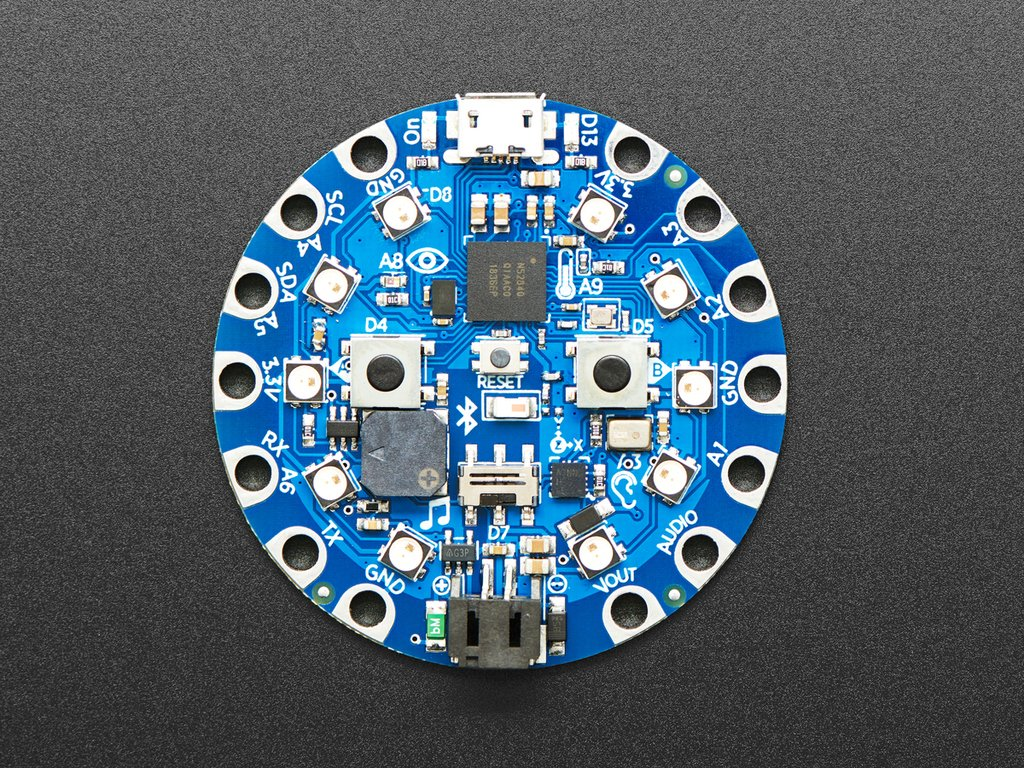

Most of the pads around the perimeter of the CPB are associated with more than one item from the `board` list.

- **AUDIO (D12 or SPEAKER)**: digital I/O and PWM out
- **A1 (D6)**: analog input, digital I/O, PWM out, and capacitive touch
- **A2 (D9)**: analog input, digital I/O, PWM out, and capacitive touch
- **A3 (D10)**: analog input, digital I/O, PWM out, and capacitive touch
- **A4 (D3)**: analog input, digital I/O, PWM out, and capacitive touch
- **A5 (D2)**: analog input, digital I/O, PWM out, and capacitive touch
- **A6 (RX or D0)**: analog input, digital I/O, PWM out, and capacitive touch
- **TX (D1)**: analog input, digital I/O, PWM out, and capacitive touch

The built-in devices are also generally associated with more than one `board` item.

- **L (D13)**: red LED
- **BUTTON_A (D4)**: momentary push button
- **BUTTON_B (D5)**: momentary push button
- **SLIDE_SWITCH (D7)**: "on/off" slider
- **NEOPIXEL (D8)**: 10 multi-color LEDs
- **LIGHT (A8)**: light sensor
- **TEMPERATURE (A9)**: temperature sensor

**The `time` Module**

The `time` module contains two often-used time-related functions

- `time.sleep()`
- `time.monotonic()`

`time.sleep()`
- Requires an argument in seconds and causes the processor to pause for that amount of time
- Outputs that were turned on before a `sleep` command will remain on while the processor is "sleeping"
- Example: `time.sleep(0.5)` will cause the processor to pause (sleep) for 0.5 seconds
- **Note:** No other commands execute while the processor sleeps

`time.monotonic()`
- Does not accept any arguments
- Returns the time in seconds (a float) since the last processor reset
- The values `time.monotonic()` returns continue to get larger until a processor reset/restart
- The CPB does not keep a real clock time/date
- Allows timing between events by comparing the value of `time.monotonic()` at one point in a script versus another
- Using `time.monotonic()` instead of `time.sleep()` will allow the processor to keep doing work instead of totally pausing

**Using `time.monotonic()`**

- Save the current clock time to a variable; `old_time` in this example
- Turn on an LED by setting its value to `True`
- Check `time.monotonic()` each pass through a `while` loop to see if at least 3 seconds have elapsed since `old_time` was set
- If 3 seconds have passed, the LED is changed to the opposite state and `time_old` is set to the new `time.monotonic()` value
- This code will create a blinking LED circuit where the LED blinks every 3 seconds without using `time.sleep()`

In [ ]:
time_old = time.monotonic()
LED1.value = True
while True:
  if time.monotonic() >= time_old + 3:     # at least 3 seconds has elapsed
      LED1.value = not LED1.value
      time_old = time.monotonic()          # reset `time_old` to the clock time

**The `digitalio` Module**

- The `digitalio` module is used for interacting with on/off style inputs and outputs, like...
  - Simple push buttons or toggle switches (inputs)
  - LED lights or fixed speed motors (outputs)
- `digitalio.DigitalInOut()` initializes a pin to be used for digital (on/off) I/O

The following sequence of commands sets up `board.D0` as a digital input named `button1`
- All digital I/O pins default to the `INPUT` state when initialized
- The second line in each of the following is not necessarily required when a pin/pad is used as a digital input

In [ ]:
# option 1
button1 = digitalio.DigitalInOut(board.D0)
button1.direction = digitalio.Direction.INPUT

In [ ]:
# option 2
button1 = digitalio.DigitalInOut(board.D0)
button1.switch_to_input()

The following code initializes `board.D13` as a digital output named `LED1`
- On the CPB `board.D13` is assigned to an on-board red LED
- Initializing a pin as an output **always** requires setting a direction
- The example code illustrates two ways to set the direction

In [ ]:
# option 1
LED1 = digitalio.DigitalInOut(board.D13)
LED1.direction = digitalio.Direction.OUTPUT

In [ ]:
# option 2
LED1 = digitalio.DigitalInOut(board.D13)
LED1.switch_to_output()

External circuits with buttons/switches or LEDs almost always need to incorporate resistors
- When used with LEDs, resistors keep the LEDs from burning out due to too much current
- With buttons/switches, resistors "anchor" the voltage when the button is not activated
- Such resistors are called pull-up or pull-down resistors

- Pull-down resistors anchor the signal to low voltage (0 V or `False`) when not actuated
- Pull-up resistors anchor the signal to high voltage (3.3 V or `True`) when not actuated
- For the built-in buttons and slide switch these resistors are included, but need to be activated
    - The buttons use pull-down resistors, i.e their values are `False` when not pressed
    - The slide switch uses a pull-up resistor; setting the value to `True` when not switched

In [ ]:
# button_a will be False when not pressed and True when pressed
button_a = digitalio.DigitalInOut(board.BUTTON_A)
button_a.switch_to_input(pull=digitalio.Pull.DOWN)

In [ ]:
# slider will be False when slid right and True when slid left
slider = digitalio.DigitalInOut(board.SLIDE_SWITCH)
slider.switch_to_input(pull=digitalio.Pull.UP)

Reading the state of digital inputs, such as `button_a`, is done with the `.value` method
- For example, `button_a.value` results in...
  - `True` (pressed based on the previous code)
  - `False` (not pressed based on the previous code)
- Getting the `.value` is typically done as part of an `if` statement (as shown below)
- `True` could mean either pressed or not pressed depending upon wiring (see information on pull up/down resistors)

Set the state of a digital output using `.value`
- For example, set the `LED1` to either on or off by setting its value to `True` or `False`
  - `LED1.value = True` will turn the LED on
  - `LED1.value = False` will turn the LED off
- The following code will turn on `LED1` any time `button_a` is `True`

In [ ]:
if button_a.value:      # same as button_a.value == True
    LED1.value = True
else:
    LED1.value = False

- A more *Pythonic* method to do the same thing as above is shown below
  - The state of `LED1` is set the same as the state of `button_a`
  - Any time `button_a.value` is `True` then `LED.value` will also be `True`
  - Notice that no `if` or `else` statements are needed

In [ ]:
LED1.value = button_a.value

Reference: [CircuitPython Basics: Digital Inputs & Outputs](https://learn.adafruit.com/circuitpython-digital-inputs-and-outputs)

**More on Resistors with Buttons**
- Whether a switch is `True` or `False` when pressed or not depends upon how it is wired
- Pull-up resistor with `button1`
  - One leg is connected to the input pin with an external resistor also connected from that leg to 3.3 V
  - Other leg is connected to ground
  - When not-pressed, the voltage is pulled-up to 3.3 V and `button1.value` is `True`
  - When pressed, `button1.value` is `False`

The CPB includes internal resistors at each digital pin
- When using an internal resistor, **do not** wire an external resistor
- If using the internal resistor, one leg of the switch is wired to the digital pin and the other leg to ground
- After setting the pin direction to input in the code, use code like one of the following...
  - `button1.pull = digitalio.Pull.UP`
  - `button1.switch_to_input(pull=digitalio.Pull.UP)`

- Using the internal resistors with switches (push buttons) requires...
  - A little bit more coding
  - A little less wiring
- Regardless of which methodology is chosen, be careful to not blend them together

**Example: Blink the red LED**

Use `digitalio` to blink the red LED (`board.D13` or `board.L`) on the CPB.

Replace all code in `code.py` on the CPB with the code from the following cell and make sure it works.

*Quick quiz*: What does the `while True:` statement do?

Change the rate at which the LED blinks to 3 seconds. Add a `print()` statement to display the status of the LED as "On" or "Off" to the REPL.


In [ ]:
# Blinking LED
# Use the Serial button in Mu to print the light status as
# "On" or "Off". Change the rate of blinking to 3 seconds.

import board
import digitalio
import time

LED = digitalio.DigitalInOut(board.D13)
LED.switch_to_output()

LED.value = False  # turn the LED "Off" to start

while True:
    LED.value = not LED.value    # alternate the LED value between True and False
    time.sleep(1.0)

**Example: Turn light on and off with the slider switch**

Fix the `digitalio` definitions to use the appropriate names from `board` for `slider` and `red_LED`. Add a single statement inside the loop to turn `red_LED` on and off with `slider`.

In [ ]:
import board
import digitalio

slider = digitalio.DigitalInOut()   # finish this definition
slider.switch_to_input(pull=digitalio.Pull.UP)

red_LED = digitalio.DigitalInOut()  # finish this definition
red_LED.direction = digitalio.Direction.OUTPUT

while True:
    # add statement here

**The `analogio` Module**

- Commands and functions in the `analogio` module are typically used to read variable signals from analog devices like...
  - Potentiometers
  - Temperature sensors
  - Light sensors
  - Flex sensors
- The voltage readings from these types of sensors often vary linearly between a low and high

The CPB boards have 3.3 V inputs/outputs
- The board converts analog inputs into numeric values for use in a script
- Adafruit boards divide the low to high voltage signals into 16-bits values
  - 0 V equates to a numeric value of `0`
  - 3.3 V equates to a numeric value of `65535` $(2^{16}-1)$
- All analog pins in `board` start with the letter `A`
- The CPB includes six analog pins/pads; `board.A1` through `board.A6`

Initialize `board.A1` as an analog input and read its value like the following

In [ ]:
light_sensor = analogio.AnalogIn(board.A1)
light_sensor.value

- The `.reference_voltage` analog input attribute can be used to check the reference voltage level (usually 3.3 V)
- The following code from Adafruit could be used to convert an input reading to an associated voltage

In [ ]:
light_sensor.value / 65535 * light_sensor.reference_voltage

The CPB does not have a true analog output pin (pad)
- It is replaced by `AUDIO` to provide for audio output to either the internal speaker or an external device
- Some other Adafruit boards have one or more true analog output (often `A0`)
- Analog outputs can be set to values between 0 and 65535 (0 to 3.3 V)
- The following code illustrates the initialization for an analog pin and setting a value

In [ ]:
var_LED = analogio.AnalogOut(board.A0)
var_LED.value = 50000   # about 76.3% of full voltage

Reference: [CircuitPython Basics: Analog Inputs & Outputs](https://learn.adafruit.com/circuitpython-basics-analog-inputs-and-outputs)

**Example: Use `analogio` to read the value of the light sensor**

Import and use the `analogio` module to read the value of the light sensor and print it to the REPL. Add an expression so that the value is only read every 2 seconds.

In [ ]:
import time
import analogio

light_sensor = analogio.AnalogIn()   # finish this definition

while True:
    # finish the expression below to assign the sensor value to a variable
    light_value = 
    print("The light level is {}".format(light_value))
    # add code below so the light level is only read and printed every 2 seconds
    

**The `pwmio` Module**

- All of the digital I/O pins on the CPB can be configured to act kind of like analog outputs
- This is done using a technique called **Pulse Width Modulation (PWM)**
- PWM acts like an analog output by pulsing the output between high and low at a particular frequency
- It gives the appearance of a variable output value
- This works well with devices like...
  - LEDs
  - Hobby motors
  - Servos

- The `pwmio` module is used when dealing with PWM outputs
- Example
  - `D6` is initialized as a PWM output
  - Output value is set using the `.duty_cycle` attribute
  - Duty cycle values must be integers from `0` (off) to `65535` (fully on)

In [ ]:
motor_pin = board.D6
motor = pwmio.PWMOut(motor_pin)
motor.duty_cycle = 42500

- The following code snippet sets the duty cycle as a percentage of full on
- The example is setting the value to 66%

In [ ]:
percentage = 66
motor.duty_cycle = int(percentage / 100 * 65535)

**Example: Increase/decrease the red LED brightness using `pwmio.PWMOut`**

Use the following code to brighten the red LED from off to fully on. Add a second loop to dim it from fully on to off.

In [ ]:
import time
import pwmio

red_LED = pwmio.PWMOut()    # complete this definition
red_LED.duty_cycle = 0      # start with the light off

while True:
    # brighten the light from low to high
    for intensity in range(0, 65536, 64):
        # set the duty cycle of the red LED to `intensity`
        
        time.sleep(0.005)
    # add a second loop that fades the light from high to low
    
    

**The `simpleio` Module**

The `simpleio` module provides for a number of specialized helper commands/functions, including...
- `tone()`
- `map_range()`
- `DigitalOut()`
- `DigitalIn()`

**`tone()`**
- The `tone(pin, frequency, duration)` function will generate a tone to play via a PWM output
- The frequency argument is in hertz and the duration is in seconds
- The duration argument is optional; if not used it defaults to 1 second

**`map_range()`**
- The `map_range(x, in_min, in_max, out_min, out_max)` function scales `x` from one range to another
- For example, `map_range(5000, 0, 65535, 0, 768)` scales the value `5000`...
    - From a of range of `0` to `65535` to a new range of `0` to `768`
    - The return value in this example will be about `58`
    - This is helpful when input devices use a different low-high range than output devices

**`DigitalOut()` and `DigitalIn()`**
- Duplicate functionality from the `digitalio` module
- They simplify the initialization of digital inputs and outputs
- Example code snippet shown below

In [ ]:
LED2 = simpleio.DigitalOut(board.D3)
Button2 = simpleio.DigitalIn(board.D4)
LED2.value = False
Button2.value

**Example: Use `map_range` from `simpleio` to scale a light level value**

Scale the light level value from the built-in light sensor from a range of 0-62000 to an integer range of 0-10. Print both the raw and scaled values every 1 second to the REPL.

In [ ]:
import board
import time
import simpleio
import analogio

light_level = analogio.AnalogIn(board.LIGHT)

while True:
    # Read, scale, and print the light level every second

**The `random` Module**

- The `random` module is used to generate pseudo-random numbers for... 
  - Script testing
  - Game play
  - Other purposes
- The included functions work like the *Python* random number generation functions previously used

The available `random` functions include
- `random.random(x)`: float between 0 and 1.0, not including 1.0
- `random.randrange(stop)`: integer between 0 and `stop`, not including stop
- `random.randrange(start, stop, step)`: integer between `start` and `stop`, not including stop, with the interval `step`
- `random.randint(start, stop)`: integer between `start` and `stop`, inclusive
- `random.choice(x)`: random item from sequence `x`

**The `displayio` Module**

The `displayio` and some of its related the modules (`terminalio`, `adafruit_display_text`, and `adafruit_displayio_ssd1306`) can be used to send text (and images and shapes) to external displays. The MECH 322 course kits include an Adafruit 0.91 inch 128x32 pixels monochrome OLED display that communicates with the CPB (or other *CircuitPython* boards) via the $I^2C$ protocol. Also included in the kit are cables with a Stemma QT connector on one end for connecting to the display and banana clips on the other end for connecting to I2C on the CPB. The wires are color-coded; red = 3.3V, black = ground, blue = SDA, and yellow = SCL.

A fair amount of code is needed to setup, initialize, and update the display with *CircuitPython*. Below is annotated code that sends three lines of text to the display. The third line updates each time through the `while True` loop. The general steps that are needed when using the display board are:

1. Import the required modules
2. Release all existing connected displays
3. Use `displayio.I2CDisplay()` to initialize and name the hardware connection
    - Named `display_bus` in the sample code
    - `board.I2C()` is the connection type
    - `device_address=0x3c` for our display

4. Create and name a display object using `adafruit_displayio_ssd1306.SSD1306()`
    - Named `display` in the sample code
    - Use the hardware connection named `display_bus`
    - Set `width=128` and `height=32`
5. Set the font to be used for text

6. Create `adafruit_display_text.label.Label` objects for each line of text
    - Named `text_line` in the sample code
    - The sample code uses a list with three objects; one for each line of text
    - Using `terminalio.FONT` yields 21 characters per line with the sample code settings

7. Create and name a `displayio.Group` into which the text objects are placed
    - Named `text_display` in the sample code
    - The sample is located at the upper left corner of the display (0,0)

8. Use `display.show()` to push the `displayio.Group` object to the physical display

9. Update the text in each `adafruit_display_text` object using the `.text` property
    - `text_display[0].text = "Hello"`
    - Will display `Hello` to the first line of the display used in the sample code
10. Use string functions and objects to create your your desired display text

Steps 1-8 are needed for any script that uses the display board from the kit. The sample code for display initialization can be copied and pasted into your `code.py` script. Those lines are essentially all of the lines before `while True:` except the `time.sleep()` command. Only the starting text needs to be changed. It is okay to initially fill with blanks, i.e. `" "*21`. You can also change the number of items in `text_line` and the x and y start values for only one or two lines of text if required.

In [ ]:
"""
stemma qt to alligator clips
red:    3.3V
black:  GND
blue:   SDA
yellow: SCL
"""

# import all modules needed for using the oled display
import board
import time
import displayio
import terminalio
import adafruit_displayio_ssd1306
from adafruit_display_text import label

# release all existing displays (otherwise errors on restart)
displayio.release_displays()

#### configure display hardware ####
# uses I2C with a specific address (on back of board)
display_bus = displayio.I2CDisplay(board.I2C(), device_address=0x3c)
# there is a specific module for our display board series
display = adafruit_displayio_ssd1306.SSD1306(display_bus, width=128, height=32)

#### configure text display ####
# assign font from terminalio
font = terminalio.FONT

# create 3 text 'adafruit_display_text.label' objects in a list
# font is 8 pixels high and display is 32 pixels high
# each line of text is initialized with 21 blank characters
# maximum number of characters with the terminalio font is 21
text_line = [
    label.Label(font=font, text=' ' * 21, color=(255, 255, 255), x=2, y=3),
    label.Label(font=font, text=' ' * 21, color=(255, 255, 255), x=2, y=13),
    label.Label(font=font, text=' ' * 21, color=(255, 255, 255), x=2, y=25)
]

# The following lines can be used to set the point on a text line that is used
# for referencing its position.
# (0, 0) is the upper left corner, (0.5, 0.0) is the center/top of the text
# The anchored_position may have to be adjusted to place the text precisely

# text_line[0].anchor_point = (0.5, 0.0)
# text_line[0].anchored_position = (64, 3)

# create a 'displayio.Group' object named 'text_display' object
# to hold the 3 lines of text
# starts at the upper, left corner of the screen (0, 0)
text_display = displayio.Group(x=0, y=0)

# show the 'text_display' group
display.show(text_display)

# initialize 3 lines of text and append them to the group object
# 20 characters maximum for each line
line = [" Hello, Brian Brady!", "-" * 21, "CircuitPy for the win"]
for i in range(3):
    text_line[i].text = line[i]
    text_display.append(text_line[i])

time.sleep(2)

while True:
    # change the text on a line by the updating its '.text' property
    # the following line clears it
    text_line[2].text = ''
    # loop through 20 iterations
    for i in range(20):
        # this option will display 12345678901234567890
        # on the bottom line adding one digit per iteration
        # text_line[2].text += str((i+1) % 10)

        # this option will display a * that moves across the
        # screen one character space per iteration
        # text_line[2].text = " "*i + "*"

        # this option will display *'s across the screen on
        # the bottom line that equal the iteration value + 1
        text_line[2].text = "*" * (i + 1)
        time.sleep(0.5)

**The `adafruit_circuitplayground` Helper Module for CPB**

- Adafruit created a helper module specifically for the Circuit Playground series of boards
- The CPB is the newest and fastest of this series
- `adafruit_circuitplayground` makes it much easier to access and use the built-in devices
- Requires specific modules be installed and available in the `lib` folder
- The `adafruit_circuitplayground` module requires more drive space and memory
- The CPB board has more than enough resources for this to not be an issue

**Required Modules in the `lib` Folder**

- The `adafruit_circuitplayground` module performs the following imports to perform its tasks
- However, you will not not be able to directly access these modules in your code unless you explicitly import them yourself
- They are only local to the `adafruit_circuitplayground` functions

- Of the above modules, only the following are not part of the standard *CircuitPython* library
- They will need to be installed in the `lib` folder of `CIRCUITPY`

  - `adafruit_bus_device`
  - `adafruit_lis3dh.mpy`
  - `adafruit_thermistor.mpy`
  - `neopixel.mpy`

**Importing the `adafruit_circuitplayground` Module**

Use the following command to import this module for use on the CPB

``` 
from adafruit_circuitplayground import cp
```

**Available `cp.` Commands**

- Following are most of the commands available after importing `adafruit_circuitplayground`
- All of the commands need to start with `cp.` to access the commands from the imported module

**Buttons, Switch, and Red LED**

- `cp.button_a` returns the value of `board.BUTTON_A` (pressed is `True`)
- `cp.button_b` returns the value of `board.BUTTON_B` (pressed is `True`)
- `cp.were_pressed` returns a set containing which buttons have been pressed since the last request
- `cp.switch` returns the value of `board.SLIDE_SWITCH` (left is `True`)
- `cp.red_led` sets the value of the red LED, i.e. `cp.red_led = True`

***NeoPixels***

`cp.pixels` works with the 10 multi-colored `board.NEOPIXEL` LEDs
- `cp.pixels.n` returns the number of NeoPixels
- `cp.pixels.auto_write`
  - If `False`, then `cp.pixels.show()` is required to make changes active
  - If `True` (which is the default), changes become active immediately
- `cp.pixels.show()` will activate any color/brightness changes when `cp.pixels.auto_write = False`


- `cp.pixels.brightness`
  - `cp.pixels.brightness = 0` is off
  - `cp.pixels.brightness = 1` is the brightest
  - `cp.pixels.brightness = 0.3` is 30% brightness

- `cp.pixels[n] = (R, G, B)` sets the color of NeoPixel `n`
  - The color is a tuple containing red, green, and blue values
  - Values for each color range from 0 to 255
- `cp.pixels[m:n] = (R, G, B)*(n-m)` sets the color of `m` thru `n-1`
- `cp.pixels[:n] = (R, G, B)*n` sets the color of the first `n` pixels
- `cp.pixels[-m:] = (R, G, B)*m` sets the color of the last `m` pixels
- `cp.pixels[n]` returns the current color values for NeoPixel `n`
- `cp.pixels.fill((R, G, B))` sets the colors of all NeoPixels

**Example: using a loop to turn on only one NeoPixel at a time from 0 thru 9 with all others turned off**

In [ ]:
cp.pixels.auto_write = False
COLOR = (0, 255, 0)
OFF = (0, 0, 0)
for i in range(10):
    cp.pixels.fill(OFF)
    cp.pixels[i] = COLOR
    cp.pixels.show()
    time.sleep(0.5)

**Example: using slicing to gradually turn on all pixels**

In [ ]:
cp.pixels.auto_write = True
COLOR = (0, 255, 0)
OFF = (0, 0, 0)
cp.pixels.fill(OFF)
for i in range(1, 11):
    cp.pixels[:i] = COLOR * i
    time.sleep(0.5)

**Accelerometer**

- `cp.acceleration` returns the x, y, and z acceleration values as a tuple
  - Example, `x, y, z = cp.acceleration`
  - `cp.acceleration.x` returns just the acceleration in the x-direction
  - `cp.acceleration.y` returns just the acceleration in the y-direction
  - `cp.acceleration.z` returns just the acceleration in the z-direction
- `cp.tapped` returns `True` if a single (or double) tap has been detected after `cp.detect_taps = 1` (or `2`) has been set
- `cp.shake(shake_threshold)` returns `True` if a shake that exceeds the threshold argument is detected

**Light, Temperature, and Touch**

- `cp.light` returns the light sensor value (values range from about 0 to 320)
- `cp.temperature` returns the value of the temperature sensor in degrees C
- `cp.touch_A1` returns `True` if capacative touch pad `A1` is touched (can be used with `A1`-`A6` and `TX`)

**Light, Temperature, and Touch, and Sound**

- `cp.light` returns the light sensor value (values range from about 0 to 320)
- `cp.temperature` returns the value of the temperature sensor in degrees C
- `cp.play_tone(frequency, duration)` plays a tone to the speaker for a specific duration (seconds)
  - Middle C is 262 Hz
  - A above middle C is 440 Hz
- `cp.start_tone(frequency)` starts playing a tone to the speaker
- `cp.stop_tone()` stops any currently playing tone
- `cp.touch_A1` returns `True` if capacative touch pad `A1` is touched (can be used with `A1`-`A6` and `TX`)
- `cp.play_file("sample.wav")` plays the file "samle.wav" to the speaker (must be a small, 22Khz (or lower), 16 bit PCM, mono  .wav file)
- `cp.loud_sound(threshold)` returns `True` if a sound above the threshold (default is 200) was detected
- `cp.sound_level` returns a float of the existing sound level

**Example: Blink the red LED using the `cp` module**

 Copy the previously used code and modify it to use the appropriate commands from the `adafruit_circuitplayground` module (i.e. `cp`) to blink the red LED.

**Example: Play a note on the speaker when a touch pad is touched**

Use `cp.start_tone()` and `cp.stop_tone()` to play a 440 Hz note on the speaker whenever `cp.touch_A4` is touched.

In [ ]:
from adafruit_circuitplayground import cp

while True:
    # add a condition to the if statement and code for both cases
    if :
        
    else:
        

**Example: Read the light level**

Use `cp.light` to simply read the light level every second and print the results to the REPL as a tuple. Show the plotter in *Mu* to see the results graphically.

In [ ]:
from adafruit_circuitplayground import cp
import time

while True:
    continue # replace this line

**Example: Read and plot the acceleration values**

Use `cp.acceleration` to read the acceleration in all 3 directions and assign the values to the variables `x`, `y`, and `z`. Print the variables as a tuple every second and show the plotter in *Mu* to see the results graphically.

In [ ]:
from adafruit_circuitplayground import cp
import time

while True:
    # Put code here for reading accelerometer and printing it every second

**Just for fun**

Replace `code.py` on the CPB with the following code. Notice the use of a dictionary.

In [ ]:
# CPB Buzzer Music
# for CPB internal speaker
# verified

from adafruit_circuitplayground.bluefruit import cp
import time


tempo = 70/1000

beats = [2, 2, 2, 2, 4, 1, 6, 8, 1, 2, 2, 2, 2, 
         4, 1, 6, 6, 1, 2, 4, 2, 2, 2, 2, 6, 4, 
         6, 2, 6, 4, 6, 8, 4, 2, 2, 2, 2, 4, 6, 
         10, 2, 2, 2, 2, 6, 4, 6, 2, 4, 2, 2, 2, 
         2, 6, 4, 6, 2, 6, 4, 6, 8]

notes = ['c', 'd', 'f', 'd', 'a', ' ','a', 'g', ' ', 
         'c', 'd', 'f', 'd', 'g', ' ', 'g', 'f', ' ', 
         'e', 'd', 'c', 'd', 'f', 'd', 'f', 'g', 'e', 
         'd', 'c', 'c', 'g', 'f', ' ','c', 'd', 'f', 
         'd', 'a', 'a', 'g', 'c', 'd', 'f', 'd', 'C', 
         'e','f', 'e', 'd', 'c', 'd', 'f', 'd', 'f', 
         'g', 'e', 'd','c', 'c', 'g', 'f']

names = ["c","d","e","f","g","a","b","C"]
frequencies = [262,294,330,349,392,440,494,523]
frequency = dict(zip(names, frequencies))

songLength = len(beats)

print()
print('You have been...\n')


for note, beat in zip(notes, beats):
    print(note, end=" ")
    duration = beat*tempo
    if note == " ":
        time.sleep(duration)
    else:
        cp.play_tone(frequency[note], duration)

print('\n')
print(chr(82)+chr(73)+chr(67)+chr(75),end=" ")
print(chr(82)+chr(79)+chr(76)+chr(76)+chr(69)+chr(68))

**Wrap it up**

Click on the **Save** button and then **Close and halt** from the **File** menu when you are done before closing the tab.